In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # <- Change here
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt

In [ ]:
# running in Google Colab to upload file
from google.colab import files
uploaded = files.upload()

Saving Titanium_Alloy_UC.csv to Titanium_Alloy_UC.csv


In [ ]:
# Loading data
fatigue_df = pd.read_csv("Titanium_Alloy_UC.csv", encoding='unicode_escape')

In [ ]:
# Preview data
print(fatigue_df.head(10))
print(fatigue_df.info())


   SL. Number  Number of Cycles  Stress (MPa)  Solution Temperature (°C)  \
0         123            100000         860.0                        932   
1         126            100000         850.0                        925   
2         158           1000000         800.0                        932   
3         161           1000000         780.0                        925   
4         164           1000000         699.0                          0   
5         189          10000000         640.0                        932   
6         192          10000000         640.0                        925   
7         195          10000000         582.0                          0   
8         159           1000000         920.0                        932   
9         190          10000000         900.0                        932   

   Solution Time (hrs)  Temperature Measurement (°C)  Ann/Age. temp (cel)  \
0                  0.0                            25                  704   
1        

In [ ]:


# Sorting data by ascending number of cycles
fatigue_df.sort_values(by=['Number of Cycles'], ascending=True, ignore_index=True, inplace=True)


In [ ]:
# Columns to drop (including target column)
drop_cols = ['Number of Cycles', 'SL. Number']

# Features and target variable
features = fatigue_df.drop(drop_cols, axis=1)
targets = np.log10(fatigue_df['Number of Cycles'])  # log-transform target

# Display the features
features

,Stress (MPa),Solution Temperature (°C),Solution Time (hrs),Temperature Measurement (°C),Ann/Age. temp (cel),Ann/age time (hrs),Total Strain (%),R,Frequency (Hz),Ti,...,C,N,O,H,Fe,Si,Sn,Nb,Mo,Zr
0,1067.63,1020,1.0,25,700,2.0,1.25,-1.0,0.2,84.90,...,0.050,0.0025,0.000,0.004,0.000,0.340,4.00,0.70,0.500,3.70
1,685.38,1025,2.0,450,1025,2.0,1.00,0.0,0.0,85.01,...,0.065,0.0020,0.090,0.000,0.000,0.305,4.02,0.71,0.505,3.54
2,700.06,1025,2.0,400,1025,2.0,1.00,0.0,0.0,85.01,...,0.065,0.0020,0.090,0.000,0.000,0.305,4.02,0.71,0.505,3.54
3,649.41,1025,2.0,500,1025,2.0,1.00,0.0,0.0,85.01,...,0.065,0.0020,0.090,0.000,0.000,0.305,4.02,0.71,0.505,3.54
4,725.00,1025,2.0,375,1025,2.0,1.00,0.0,0.0,85.01,...,0.065,0.0020,0.090,0.000,0.000,0.305,4.02,0.71,0.505,3.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,180.72,0,0.0,400,1300,4.0,0.00,0.0,20.0,52.39,...,0.016,0.5300,0.002,0.023,0.000,0.000,0.00,18.70,0.000,0.00
216,253.59,0,0.0,25,1300,4.0,0.00,0.0,20.0,52.39,...,0.016,0.5300,0.002,0.023,0.000,0.000,0.00,18.70,0.000,0.00
217,282.17,0,0.0,600,1300,4.0,0.00,0.0,20.0,52.39,...,0.016,0.5300,0.002,0.023,0.000,0.000,0.00,18.70,0.000,0.00
218,500.00,0,0.0,25,0,0.0,0.00,-1.0,30.0,84.69,...,0.050,0.0025,0.105,0.004,0.009,0.340,4.00,0.69,0.540,3.72


In [ ]:
# Convert features to float64
features = features.astype('float64')

#display the features
features

,Stress (MPa),Solution Temperature (°C),Solution Time (hrs),Temperature Measurement (°C),Ann/Age. temp (cel),Ann/age time (hrs),Total Strain (%),R,Frequency (Hz),Ti,...,C,N,O,H,Fe,Si,Sn,Nb,Mo,Zr
0,1067.63,1020.0,1.0,25.0,700.0,2.0,1.25,-1.0,0.2,84.90,...,0.050,0.0025,0.000,0.004,0.000,0.340,4.00,0.70,0.500,3.70
1,685.38,1025.0,2.0,450.0,1025.0,2.0,1.00,0.0,0.0,85.01,...,0.065,0.0020,0.090,0.000,0.000,0.305,4.02,0.71,0.505,3.54
2,700.06,1025.0,2.0,400.0,1025.0,2.0,1.00,0.0,0.0,85.01,...,0.065,0.0020,0.090,0.000,0.000,0.305,4.02,0.71,0.505,3.54
3,649.41,1025.0,2.0,500.0,1025.0,2.0,1.00,0.0,0.0,85.01,...,0.065,0.0020,0.090,0.000,0.000,0.305,4.02,0.71,0.505,3.54
4,725.00,1025.0,2.0,375.0,1025.0,2.0,1.00,0.0,0.0,85.01,...,0.065,0.0020,0.090,0.000,0.000,0.305,4.02,0.71,0.505,3.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,180.72,0.0,0.0,400.0,1300.0,4.0,0.00,0.0,20.0,52.39,...,0.016,0.5300,0.002,0.023,0.000,0.000,0.00,18.70,0.000,0.00
216,253.59,0.0,0.0,25.0,1300.0,4.0,0.00,0.0,20.0,52.39,...,0.016,0.5300,0.002,0.023,0.000,0.000,0.00,18.70,0.000,0.00
217,282.17,0.0,0.0,600.0,1300.0,4.0,0.00,0.0,20.0,52.39,...,0.016,0.5300,0.002,0.023,0.000,0.000,0.00,18.70,0.000,0.00
218,500.00,0.0,0.0,25.0,0.0,0.0,0.00,-1.0,30.0,84.69,...,0.050,0.0025,0.105,0.004,0.009,0.340,4.00,0.69,0.540,3.72


In [ ]:
# alculating the coverage percentage of values within a specified range
def coverage(y, yL, yH):
    return np.sum(100 / y.shape[0] * ((y > yL) & (y < yH)))

In [ ]:
# Parameters
nruns = 1
nfolds = 5


In [ ]:
# Setup variables and Evaluating multiple runs of the model
PearsonCC = np.zeros((nruns, nfolds))
R2_score = np.zeros_like(PearsonCC)
RMSE = np.zeros_like(PearsonCC)
MAE = np.zeros_like(PearsonCC)

test_coverage = np.zeros_like(PearsonCC)
median_interval_width = np.zeros_like(PearsonCC)
composite_metric = np.zeros_like(PearsonCC)


Run # 1 Fold # 1
Pearson CC: 0.9033577326870356
R2 score: 0.8022495470752452
RMSE: 0.8815215811462415
MAE: 0.5272310626086127
Coverage: 81.8181818181818
Pearson R2 median: 0.9033577326870356
R2 median: 0.8022495470752452
RMSE median: 0.8815215811462415
Interval Width: 1.5567500115252404
Composite Metric: 0.7742273372346614


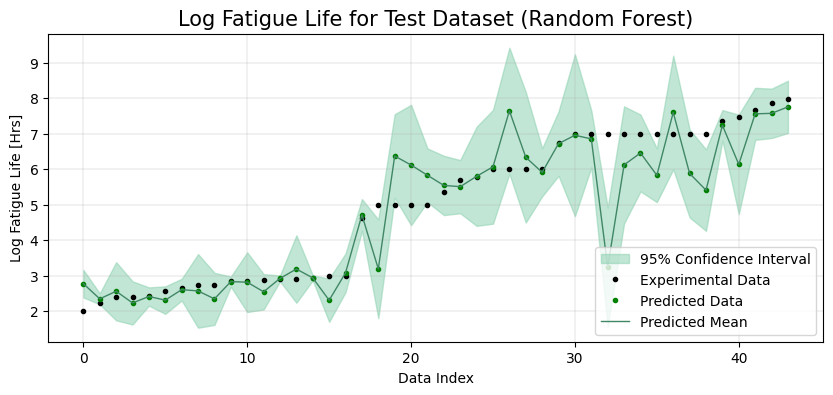

--------------------
Run # 1 Fold # 2
Pearson CC: 0.9622132157472759
R2 score: 0.9219285530328866
RMSE: 0.5105874946867512
MAE: 0.3529272372604167
Coverage: 95.45454545454544
Pearson R2 median: 0.9622132157472759
R2 median: 0.9219285530328866
RMSE median: 0.5105874946867512
Interval Width: 1.5477435220442897
Composite Metric: 0.8774345610139795


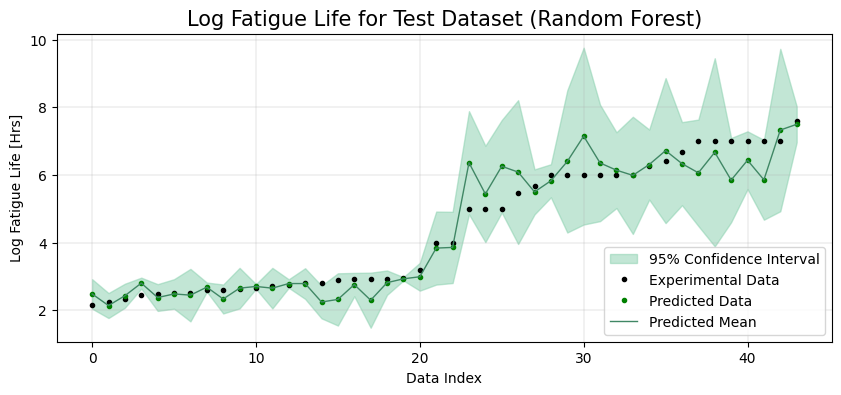

--------------------
Run # 1 Fold # 3
Pearson CC: 0.971968032332024
R2 score: 0.9442077133275332
RMSE: 0.433877316842237
MAE: 0.3051353943411321
Coverage: 93.18181818181816
Pearson R2 median: 0.971968032332024
R2 median: 0.9442077133275332
RMSE median: 0.433877316842237
Interval Width: 1.20377400049752
Composite Metric: 0.9065438154476462


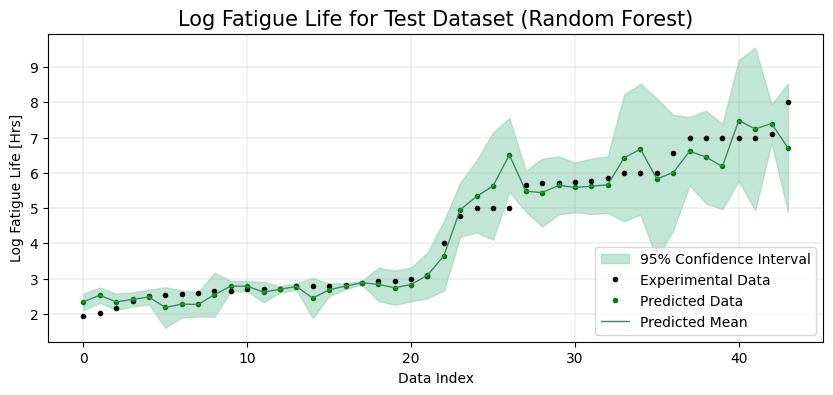

--------------------
Run # 1 Fold # 4
Pearson CC: 0.9689227327701075
R2 score: 0.9277155878922434
RMSE: 0.5103029189948123
MAE: 0.33920053249074067
Coverage: 90.90909090909089
Pearson R2 median: 0.9689227327701075
R2 median: 0.9277155878922434
RMSE median: 0.5103029189948123
Interval Width: 1.130863645683931
Composite Metric: 0.9028881586930714


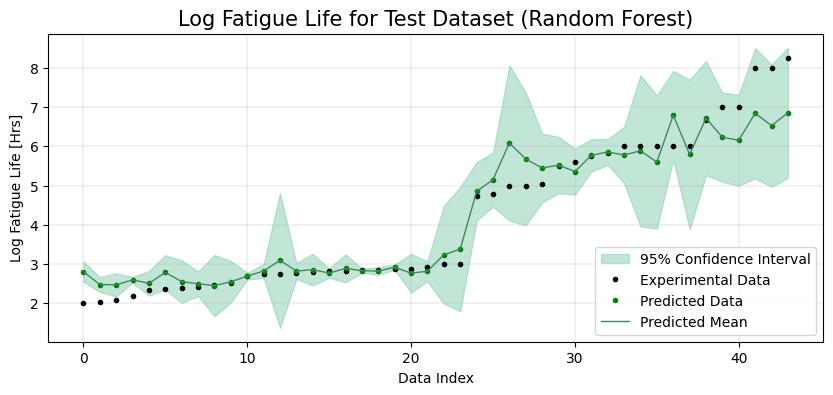

--------------------
Run # 1 Fold # 5
Pearson CC: 0.9504888622727852
R2 score: 0.9030166000492383
RMSE: 0.5793174633342633
MAE: 0.3735027013503666
Coverage: 84.0909090909091
Pearson R2 median: 0.9504888622727852
R2 median: 0.9030166000492383
RMSE median: 0.5793174633342633
Interval Width: 1.349548621237397
Composite Metric: 0.815928941602074


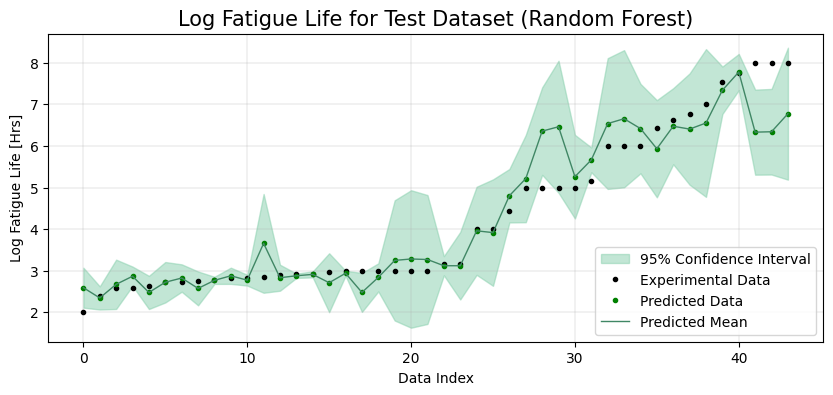

--------------------


In [ ]:
# Loop over runs and folds

for j in range(nruns):
    kf = KFold(n_splits=nfolds, shuffle=True, random_state=123+j)

    for i, (tr, ts) in enumerate(kf.split(targets)):
        print('Run #', j+1, "Fold #", i+1)

        X_train, X_test = features.iloc[tr], features.iloc[ts]
        y_train, y_test = targets[tr], targets[ts]

        # Scaling features using MinMaxScaler
        scale = MinMaxScaler()
        X_train = scale.fit_transform(X_train)
        X_test = scale.transform(X_test)

        # Defining / Train Random Forest Regressor
        model = RandomForestRegressor(n_estimators=100, random_state=123+j, n_jobs=-1)

        # Fit model
        model.fit(X_train, y_train)

        # Predict mean (point estimates)
        y_pred_test = model.predict(X_test)

        # As we know Random Forest Regression does not provide std dev by default so it will predict std dev from every individual tree in our case it 100 trees.
        # Approximate uncertainty by using the std deviation of predictions from individual trees.
        all_tree_preds = np.array([tree.predict(X_test) for tree in model.estimators_])
        y_pred_unc_test = np.std(all_tree_preds, axis=0)

        # Calculate metrics
        PearsonCC[j, i] = pearsonr(y_test, y_pred_test)[0]
        R2_score[j, i] = r2_score(y_test, y_pred_test)
        RMSE[j, i] = sqrt(mean_squared_error(y_pred_test, y_test))
        MAE[j, i] = np.mean(abs(y_pred_test - y_test))

        # Prediction intervals for coverage
        df_test_low = y_pred_test - 2 * y_pred_unc_test
        df_test_median = y_pred_test
        df_test_high = y_pred_test + 2 * y_pred_unc_test

        test_coverage[j, i] = coverage(y_test, df_test_low, df_test_high)

        print(f'Pearson CC: {PearsonCC[j, i]}')
        print(f'R2 score: {R2_score[j, i]}')
        print(f'RMSE: {RMSE[j, i]}')
        print(f'MAE: {MAE[j, i]}')
        print(f'Coverage: {test_coverage[j, i]}')

        print(f"Pearson R2 median: {pearsonr(y_test, df_test_median)[0]}")
        print(f"R2 median: {r2_score(y_test, df_test_median)}")
        print(f"RMSE median: {np.sqrt(mean_squared_error(y_test, df_test_median))}")

        # Interval width for uncertainty quantification
        median_interval_width[j, i] = np.median(df_test_high - df_test_low)
        print(f'Interval Width: {median_interval_width[j, i]}')

        # Composite metric: coverage + inverse interval width weighted
        composite_metric[j, i] = 0.75 * test_coverage[j, i] / 100 + 0.25 * (1 / median_interval_width[j, i])
        print(f'Composite Metric: {composite_metric[j, i]}')

        # Plot uncertainty quantification
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
        iteration_list = [i for i in range(len(y_test))]

        ax.fill_between(iteration_list,
                        np.squeeze(y_pred_test) - 2 * np.squeeze(y_pred_unc_test),
                        np.squeeze(y_pred_test) + 2 * np.squeeze(y_pred_unc_test),
                        alpha=0.5, color='#86cfac', label='95% Confidence Interval')

        ax.plot(iteration_list, y_test, 'ko', markersize=3, label="Experimental Data")
        ax.plot(iteration_list, np.squeeze(y_pred_test), 'go', markersize=3, label="Predicted Data")
        ax.plot(iteration_list, y_pred_test, '-', linewidth=1, color="#408765", label="Predicted Mean")

        ax.legend(loc=4, fontsize=10, frameon=True)
        ax.set_xlabel("Data Index", fontsize=10)
        ax.set_ylabel("Log Fatigue Life [Hrs]", fontsize=10)
        ax.set_title("Log Fatigue Life for Test Dataset (Random Forest)", fontsize=15)
        ax.grid(True, which='major', linestyle='-', linewidth='0.25')

        plt.show()
        print(20 * '-')




In [ ]:
# Create DataFrame with fold results
df1 = pd.DataFrame({
    'Pearson CC': PearsonCC.flatten(),
    'R2 Score': R2_score.flatten(),
    'RMSE': RMSE.flatten(),
    'MAE': MAE.flatten(),
    'Coverage': test_coverage.flatten()
})

print(df1)


   Pearson CC  R2 Score      RMSE       MAE   Coverage
0    0.903358  0.802250  0.881522  0.527231  81.818182
1    0.962213  0.921929  0.510587  0.352927  95.454545
2    0.971968  0.944208  0.433877  0.305135  93.181818
3    0.968923  0.927716  0.510303  0.339201  90.909091
4    0.950489  0.903017  0.579317  0.373503  84.090909


In [ ]:
# Calculate mean and std of metrics across folds and runs
PearsonCC_mean = np.mean(PearsonCC)
R2_score_mean = np.mean(R2_score)
RMSE_mean = np.mean(RMSE)
MAE_mean = np.mean(MAE)
test_coverage_mean = np.mean(test_coverage)

PearsonCC_std = np.std(PearsonCC)
R2_score_std = np.std(R2_score)
RMSE_std = np.std(RMSE)
MAE_std = np.std(MAE)
test_coverage_std = np.std(test_coverage)

In [ ]:
# Summary DataFrame
df2 = pd.DataFrame({
    'Pearson CC Mean': [PearsonCC_mean], 'Pearson CC Std': [PearsonCC_std],
    'R2 Score Mean': [R2_score_mean], 'R2 Score Std': [R2_score_std],
    'RMSE Mean': [RMSE_mean], 'RMSE Std': [RMSE_std],
    'MAE Mean': [MAE_mean], 'MAE Std': [MAE_std],
    'Test Coverage Mean': [test_coverage_mean], 'Test Coverage Std': [test_coverage_std]
})



In [ ]:
df2

,Pearson CC Mean,Pearson CC Std,R2 Score Mean,R2 Score Std,RMSE Mean,RMSE Std,MAE Mean,MAE Std,Test Coverage Mean,Test Coverage Std
0,0.95139,0.025123,0.899824,0.050532,0.583121,0.156138,0.379599,0.077098,89.090909,5.261744


In [ ]:
# Additional DataFrame for coverage, interval width, and composite metric
df3 = pd.DataFrame({
    'Coverage': test_coverage.flatten(),
    'Interval Width': median_interval_width.flatten(),
    'Composite Metric': composite_metric.flatten()
})

df3

,Coverage,Interval Width,Composite Metric
0,81.818182,1.556750,0.774227
1,95.454545,1.547744,0.877435
2,93.181818,1.203774,0.906544
3,90.909091,1.130864,0.902888
4,84.090909,1.349549,0.815929


In [ ]:
# Calculate mean and std of coverage, interval width, composite metric
test_coverage_mean = np.mean(test_coverage)
median_interval_width_mean = np.mean(median_interval_width)
composite_metric_mean = np.mean(composite_metric)

test_coverage_std = np.std(test_coverage)
median_interval_width_std = np.std(median_interval_width)
composite_metric_std = np.std(composite_metric)

df4 = pd.DataFrame({
    'Coverage Mean': [test_coverage_mean], 'Coverage Std': [test_coverage_std],
    'Interval Width Mean': [median_interval_width_mean], 'Interval Width Std': [median_interval_width_std],
    'Composite Metric Mean': [composite_metric_mean], 'Composite Metric Std': [composite_metric_std],
})

df4

,Coverage Mean,Coverage Std,Interval Width Mean,Interval Width Std,Composite Metric Mean,Composite Metric Std
0,89.090909,5.261744,1.357736,0.173754,0.855405,0.051968
